<a href="https://colab.research.google.com/github/jleacock2020/CourseraDataAnalystWork/blob/main/Dash%26Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning Objectives**

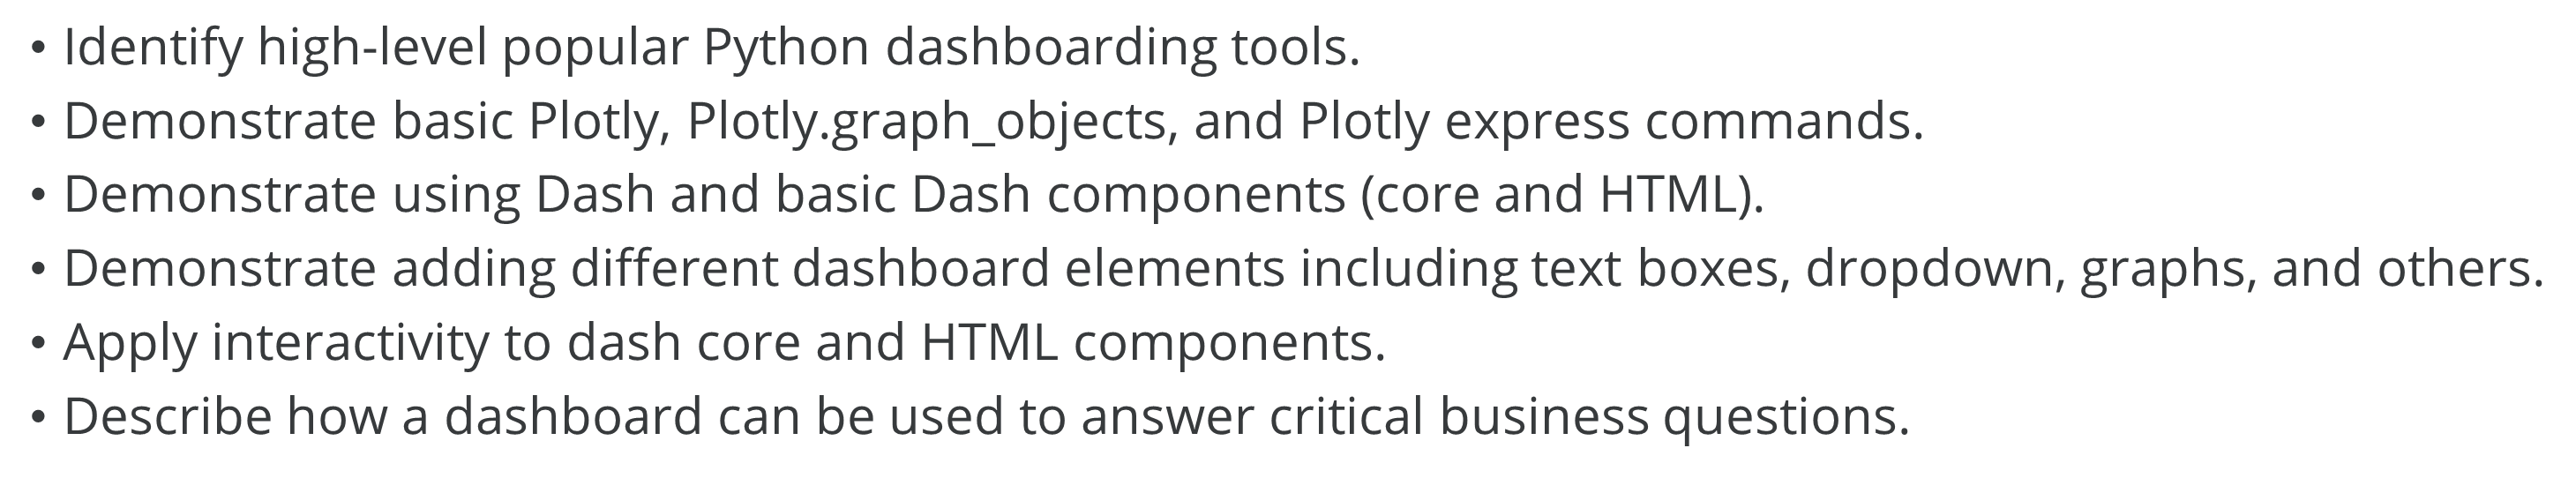

There are several libraries available in Python like Matplotlib, Seaborn, etc. for data visualization. But they render only the static images of the charts/plots and due to this, many crucial things get lost in the visualization.

Wouldn’t it be amazing if we could interact better with the charts by hovering in (or) zooming in?

Plotly allows us to do the same.

Plotly is an open-source data visualization library to create interactive and publication-quality charts/graphs.

Plotly offers implementation of many different graph types/objects like line plot, scatter plot, area plot, histogram, box plot, bar plot, etc.

Plotly supports interactive plotting in commonly used programming languages like Python, R, MATLAB, Javascript, etc.


In [ ]:
import pandas as pd
import numpy as np

# pd.set_option("max_columns", 30)

import plotly.express as px
import plotly.graph_objects as go

starbucks_locations = pd.read_csv("starbucks_store_locations.csv")
# starbucks_locations.head()

starbucks_dist = starbucks_locations.groupby(by=["Country", "State/Province", "City"]).count()[["Store Number"]].rename(columns={"Store Number":"Count"})
starbucks_dist["World"] = "World"
starbucks_dist = starbucks_dist.reset_index()
# starbucks_dist.head()

fig = px.sunburst(starbucks_dist,
                  path=["World", "Country", "State/Province", "City"],
                  values='Count',
                  title="Starbucks Store Count Distribution World Wide [Country, State, City]",
                  width=750, height=750)
fig.show()



[link text](https://coderzcolumn.com/tutorials/data-science/how-to-create-sunburst-chart-in-python-plotly)

**What is Dash?**

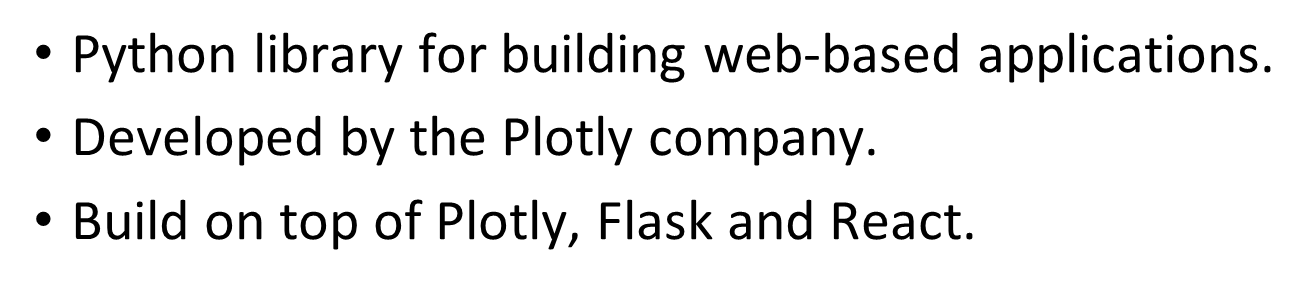



Dash is a python framework created by plotly for creating interactive web applications. Dash is written on the top of Flask, Plotly.js and React.js. With Dash, you don’t have to learn HTML, CSS and Javascript in order to create interactive dashboards, you only need python. Dash is open source and the application build using this framework are viewed on the web browser.


Dash components come prepackaged in Python libraries. Some of them come with Dash when you install it. The rest you have to install separately. You’ll see two sets of components in almost every app:

**Dash HTML Components**  provides you with Python wrappers for HTML elements. For example, you could use this library to create elements such as paragraphs, headings, or lists.


**Dash Core Components** provides you with Python abstractions for creating interactive user interfaces. You can use it to create interactive elements such as graphs, sliders, or dropdowns

**Dash applications are made up of 2 building blocks :**

**Layout**                 &                         **Callbacks**

Layout describes the look and feel of the app, it defines the elements such as graphs, dropdowns etc and the placement, size, color etc of these elements.
Dash contains Dash HTML components using which we can create and style HTML content such as headings, paragraph, images etc using python. Elements such as graphs, dropdowns, sliders are created using Dash Core components.

Callbacks are used to bring interactivity to the dash applications. These are the functions using which, for example, we can define the activity that would happen on clicking a button or a dropdown.


In [ ]:
#Install libraries

!pip install dash
!pip install dash-renderer
!pip install dash_html_components
!pip install dash_core_components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014851 sha256=c49d01cfc7a253f12ea92e5aa5c149c28d8c13e6cddd0cd115df5472055c285d
  Stored in directory: /root/.cache/pip/wheels/bd/b7/17/d60d18a7b3420135dfe0ce04d361b396f32b66b75a40471bb6
Successfully built dash-renderer


In [ ]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

<ipython-input-17-a51a8aab08c3>:2: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

<ipython-input-17-a51a8aab08c3>:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`



In [ ]:
app = dash.Dash()  #Create an instance

In [ ]:
app = dash.Dash(__name__)

# app = dash.Dash(): Creates a Dash app with default settings.

# app = dash.Dash(__name__): Creates a Dash app with the module name set to __name__, which is useful when running the Dash app as the main script.


In [ ]:
# You create an instance of the Dash class.
# If you’ve used Flask before, then initializing a Dash class may look familiar.
#  In Flask, you usually initialize a WSGI application using Flask(__name__).
#  Similarly, for a Dash app, you use Dash(__name__).


Next, you’ll define the layout property of your application. This property dictates the look of your app. In this case, you’ll use a heading with a description below it and two graphs. Here’s how you define it:


In [ ]:
app.layout = html.Div([
   html.H1("Hello Dashboard"),
   html.Div("Dash- Data product development framework for Plotly"),
])
if __name__ == '__main__':
    app.run_server(port=8050)

<IPython.core.display.Javascript object>

The app.layout is typically defined as a hierarchical structure, with a top-level container, such as html.Div, containing other components like dcc.Graph, dcc.Dropdown, html.H1, etc. Each component can have properties (attributes) that define its behavior and appearance.

Here's a breakdown of the basic components often used in app.layout:

html.Div: A container that groups multiple components together. It is used to organize the layout and apply styles to groups of elements.

dcc.Graph: Represents a plotly graph. It displays visualizations like line charts, bar charts, scatter plots, etc.

dcc.Dropdown: A dropdown component that allows users to select from a list of options.

html.H1, html.H2, ..., html.H6: Heading components to display different levels of headings.

html.P: Paragraph component to display text paragraphs.

html.Button: A button component that users can click to trigger certain actions.

dcc.Input: An input component that allows users to input text or data.

In [ ]:
app.layout = html.Div([
   html.H1("Hello Dashboard"),
   html.Div("Dash- Data product development framework for Plotly"),

    dcc.Graph(
        id="Sample Graph",
        figure={
            'data' : [
                {"x":[2,3,4],"y":[5,10,15],"type":'line',"name":'SF1'},
                {"x":[2,3,4],"y":[25,30,35],"type":'line',"name":'SF2'}
            ],
            'layout' : {'title':'Simple Line Chart'}
            })
    ])

In [ ]:

if __name__ == '__main__':
    app.run_server(port=8050)

<IPython.core.display.Javascript object>

Another example

In [ ]:
app=dash.Dash()

In [ ]:
app.layout = html.Div([
   html.H1(children="Hello Dashboard",
          style={'textAlign':'center','color':'green'}),
    html.Div(children="Dash- Data product development framework for Plotly",
           style={'textAlign':'center','color':'red'}),
    html.Button("Click me !!", id="my-button"),
    html.Div(id="my-output"),

    dcc.Graph(
        id="Sample Graph",
       figure={
            'data' : [
                {"x":[2,3,4],"y":[5,10,15],"type":'bar',"name":'SF1'},
                {"x":[2,3,4],"y":[25,30,35],"type":'bar',"name":'SF2'}
            ],
            'layout' : {
                'plot_bgcolor':'green',
                'paper_bgcolor':'aqua',
                'font':{
                    'color':'red'

                },
                'title':'Simple Bar Chart'}
            })
    ])

@app.callback(
    [Output("my-output", "children")],
    [Input("my-button", "n_clicks")]
)

def clicked_output(v):
    if v == None:
        raise PreventUpdate
    return [f"You clicked {v} times"]

if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>

**Another Example**

Link to the datset: https://drive.google.com/file/d/1hjxQvvLZiN3rtKauDKHRpyHnL3kqkvVK/view?usp=sharing

In [ ]:
#  Step 2: Preparing to build the Dash app
# from dash import Dash, html, dcc, Input, Output

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import plotly.express as px

avocado = pd.read_csv('avocado.csv')

app = dash.Dash(__name__)

In [ ]:
# Step 3: Building the layout
geo_dropdown = dcc.Dropdown(options=[{'label': region, 'value': region} for region in avocado['region'].unique()],
    value='New York')


app.layout = html.Div(children=[
    html.H1(children='Avocado Prices Dashboard'),
    geo_dropdown,
    dcc.Graph(id='price-graph')
])


In [ ]:
# Step 4: Adding the callback function
@app.callback(
    Output(component_id='price-graph', component_property='line_fig'),
    Input(component_id='geo_dropdown', component_property='value')
)
def update_graph(selected_geography):
    filtered_avocado = avocado[avocado['region'] == selected_geography]
    print(filtered_avocado)
    line_fig = px.line(filtered_avocado,
                       x='Date', y='AveragePrice',
                        color='blue',
                       line_shape='linear',
                       title=f'Avocado Prices in {selected_geography}')
    return line_fig

In [ ]:
# Step 5: Running the dashboard
if __name__ == '__main__':
    app.run_server(port=8050)  #or debug= True

<IPython.core.display.Javascript object>

Output: This is used to define the components within the layout which will be updated when the function below the callback (graph_update()) return some object. Output function takes 2 arguments — 1) component_id defines the id of the component we want to update with our function graph_update. We want to update stock prices chart within the dcc.Graph, so we will set the component id to ‘line_plot’, which is id of our graph component. 2) Component property defines the property of the component that will be updated, which is figure property of dcc.Graph in our layout.


Input: This is used to define the components, the change in whose value will trigger the callback. Input function also takes component_id and component_property as argument. We want the callback to get triggered based on change in the value of our dropdown, so we set the component_property to ‘value’ property of dropdown. Please note that Input is defined within a list.
The component property of Input function, which is ‘value’ of the dropdown, goes as an argument within the function graph_update. Inside the function we are creating scatter plot and returning the figure object fig, which is passed to the figure property of dcc.Graph using the Output function of the callback.


<IPython.core.display.Javascript object>

**TEMPLATE**




To make it easier to use Dash with Plotly in Python code, you can follow these steps:

**Install Dependencies:**

 Make sure you have installed the necessary libraries. You need dash, dash-core-components, dash-html-components, and plotly to create Dash applications with Plotly graphs.

!pip install dash dash-core-components

dash-html-components plotly


**Import Modules:**
Import the required modules in your Python script. You'll need dash, dash_core_components, dash_html_components, and plotly.graph_objs:


import dash

import dash_core_components as dcc

import dash_html_components as html

import plotly.graph_objs as go

**Initialize the Dash App: Create an instance of the Dash app:**

app = dash.Dash(__name__)


**Define the Layout:**

 Define the layout of your Dash app using dash_html_components to structure the layout and dcc.Graph to create Plotly graphs:


app.layout = html.Div(children=[

    html.H1("Welcome to My Dashboard"),

    html.P("This is a simple example of Dash layout."),

    dcc.Graph(id='example-graph'),

])

**Create Callbacks** (if needed): If you want to add interactivity to your app, create callbacks using the @app.callback decorator.



@app.callback(
    dash.dependencies.Output('example-graph', 'figure'),

    [dash.dependencies.Input('dropdown', 'value')]

)


def update_graph(selected_value):

    # Your callback logic here

    # Return a Plotly graph figure
    pass

**Run the App:** Run the Dash app using app.run_server():


if __name__ == '__main__':
    app.run_server(debug=True)



With these steps, you can create a basic Dash application with Plotly graphs in your Python code. Dash's declarative syntax makes it easy to build interactive web applications with minimal HTML and JavaScript code.

